# SLC FINAL EXAM

### DATASET: 

This dataset contains daily weather observations from numerous Australian weather stations.

The target variable is RainTomorrow. This means: Did it rain the next day? Yes or No.

### ATTRIBUTE INFORMATION:  

 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 


1. 'Date'= The date of observation

2. 'Location'=The common name of the location of the weather station

3. 'MinTemp'= The minimum temperature in degrees celsius

4. 'MaxTemp'= The maximum temperature in degrees celsius

5. 'Rainfall' = The amount of rainfall recorded for the day in mm

6. 'Evaporation'= The so-called Class A pan evaporation (mm) in the 24 hours to 9am
       
7. 'Sunshine'= The number of hours of bright sunshine in the day.

8. 'WindGustDir'= The direction of the strongest wind gust in the 24 hours to midnight

9. 'WindGustSpeed'= The speed (km/h) of the strongest wind gust in the 24 hours to midnight

10. 'WindDir9am'= Direction of the wind at 9am

11. 'WindDir3pm' = Direction of the wind at 3pm

12. 'WindSpeed9am'= Wind speed (km/hr) averaged over 10 minutes prior to 9am

13. 'WindSpeed3pm'=  Wind speed (km/hr) averaged over 10 minutes prior to 3pm

14. 'Humidity9am'= Humidity (percent) at 9am

15. 'Humidity3pm'= Humidity (percent) at 3pm

16. 'Pressure9am'= Atmospheric pressure (hpa) reduced to mean sea level at 9am

17. 'Pressure3pm'= Atmospheric pressure (hpa) reduced to mean sea level at 3pm

18. 'Cloud9am'= Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are

19. 'Cloud3pm'= Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values

20. 'Temp9am'= Temperature (degrees C) at 9am
       
21. 'Temp3pm'=  Temperature (degrees C) at 3pm

22. 'RainToday'=  Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

23. 'RISK_MM'= The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk".

24. 'RainTomorrow'= The target variable. Did it rain tomorrow?

### 1.	Read the dataset (tab, csv, xls, txt, inbuilt dataset)

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from warnings import filterwarnings
filterwarnings ('ignore')

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.float_format = '{:.6f}'.format

import statsmodels
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler , LabelEncoder

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier , StackingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score , recall_score , f1_score , roc_auc_score , auc , precision_recall_curve , average_precision_score




In [3]:
import csv

with open("data_set.csv","r")as file:
    
    reader=csv.reader(file)
    
df=pd.read_csv("data_set.csv")

df.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,07-03-2012,Wollongong,16.000000,20.400000,8.200000,NaN,NaN,S,63.000000,SSW,SW,39.000000,20.000000,69.000000,92.000000,1018.500000,1017.600000,1.000000,8.000000,17.400000,15.600000,Yes,78.600000,Yes
1,06-01-2011,PerthAirport,18.500000,25.900000,16.000000,5.400000,11.800000,WSW,39.000000,SSW,WSW,20.000000,22.000000,60.000000,36.000000,1004.600000,1003.600000,7.000000,1.000000,22.200000,25.100000,Yes,0.000000,No
2,29-06-2014,Penrith,8.700000,16.500000,0.000000,NaN,NaN,WNW,56.000000,WNW,WNW,19.000000,22.000000,41.000000,41.000000,NaN,NaN,NaN,NaN,13.100000,15.100000,No,0.000000,No
3,16-12-2008,Cairns,25.500000,33.900000,0.200000,5.000000,7.000000,SSE,41.000000,SSE,SE,11.000000,19.000000,64.000000,59.000000,1009.800000,1007.400000,6.000000,5.000000,30.800000,31.500000,No,0.000000,No
4,21-04-2015,SalmonGums,3.800000,23.000000,0.000000,NaN,NaN,N,28.000000,NE,W,13.000000,7.000000,56.000000,29.000000,NaN,NaN,NaN,NaN,14.000000,21.100000,No,0.000000,No


In [4]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1040 non-null   object 
 1   Location       1040 non-null   object 
 2   MinTemp        1035 non-null   float64
 3   MaxTemp        1035 non-null   float64
 4   Rainfall       1029 non-null   float64
 5   Evaporation    582 non-null    float64
 6   Sunshine       533 non-null    float64
 7   WindGustDir    969 non-null    object 
 8   WindGustSpeed  969 non-null    float64
 9   WindDir9am     981 non-null    object 
 10  WindDir3pm     1014 non-null   object 
 11  WindSpeed9am   1032 non-null   float64
 12  WindSpeed3pm   1023 non-null   float64
 13  Humidity9am    1031 non-null   float64
 14  Humidity3pm    1016 non-null   float64
 15  Pressure9am    929 non-null    float64
 16  Pressure3pm    932 non-null    float64
 17  Cloud9am       613 non-null    float64
 18  Cloud3pm

In [6]:
df.shape

(1040, 24)

### 2.	Summarize important observations from the data set (5 Marks)

Some pointers which would help you, but don’t be limited by these

a.	Find out number of rows; no. & types of variables (continuous, categorical etc.)

b.	Calculate five-point summary for numerical variables

c.	Summarize observations for categorical variables – no. of categories, % observations in each category


In [7]:
#2A
num_rows = len(df)
var_types = df.dtypes.value_counts()

print("Number of rows :" , num_rows)
print("Number and types of variables :" , var_types)

Number of rows : 1040
Number and types of variables : float64    17
object      7
dtype: int64


In [8]:
#2B
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,1035.000000,1035.000000,1029.000000,582.000000,533.000000,969.000000,1032.000000,1023.000000,1031.000000,1016.000000,929.000000,932.000000,613.000000,597.000000,1034.000000,1022.000000,1040.000000
mean,12.008019,23.055942,2.185520,5.183505,7.606379,40.026832,13.768411,18.414467,69.535403,51.698819,1017.277718,1014.931438,4.592170,4.447236,16.794584,21.477495,2.158365
std,6.176816,6.809834,7.502780,3.426213,3.756107,13.703520,8.350102,8.446346,18.204141,20.227374,7.353785,7.243600,2.897498,2.745218,6.101344,6.665932,7.634139
min,-4.100000,-0.800000,0.000000,0.400000,0.000000,9.000000,0.000000,0.000000,6.000000,3.000000,986.300000,989.300000,0.000000,0.000000,-2.800000,-2.900000,0.000000
25%,7.500000,17.900000,0.000000,2.650000,5.000000,31.000000,7.000000,13.000000,58.000000,37.000000,1012.700000,1010.000000,1.000000,2.000000,12.300000,16.400000,0.000000
50%,11.800000,22.500000,0.000000,4.400000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.500000,1015.100000,6.000000,5.000000,16.600000,21.050000,0.000000
75%,16.350000,27.700000,0.800000,7.000000,10.600000,48.000000,19.000000,24.000000,83.000000,65.000000,1022.300000,1019.900000,7.000000,7.000000,20.900000,25.900000,0.600000
max,28.600000,43.900000,121.400000,25.600000,13.800000,113.000000,52.000000,54.000000,100.000000,100.000000,1040.200000,1035.700000,8.000000,8.000000,39.100000,42.400000,88.600000


In [9]:
#2C

cat_cols = df.select_dtypes(include =['object']).columns

summary = []

for column in cat_cols:
    cat = df[column].value_counts()
    cat_percent = df[column].value_counts(normalize = True) * 100
    summary.append((column , len(cat) , cat_percent))
    
print("Categorical Variable Summary: ")
for column , num_cat , cat_percent in summary:
    print(f"/n{column}:")
    print(f"Number of categories: {num_cat}")
    print("Percentage of observations in each category:")
    print(cat_percent)

Categorical Variable Summary: 
/nDate:
Number of categories: 890
Percentage of observations in each category:
23-07-2016   0.384615
16-06-2017   0.288462
31-08-2010   0.288462
07-04-2015   0.288462
03-05-2014   0.288462
02-10-2013   0.288462
22-03-2012   0.288462
16-12-2009   0.288462
21-04-2017   0.288462
04-08-2009   0.288462
14-10-2013   0.288462
16-05-2017   0.192308
19-08-2011   0.192308
29-01-2015   0.192308
14-07-2010   0.192308
20-07-2012   0.192308
14-03-2015   0.192308
05-10-2012   0.192308
11-06-2013   0.192308
12-03-2017   0.192308
14-05-2011   0.192308
12-01-2010   0.192308
21-01-2012   0.192308
03-09-2009   0.192308
11-07-2011   0.192308
17-10-2016   0.192308
19-10-2009   0.192308
01-05-2017   0.192308
31-10-2009   0.192308
15-01-2015   0.192308
24-11-2015   0.192308
30-03-2010   0.192308
07-03-2017   0.192308
24-10-2009   0.192308
21-04-2012   0.192308
07-02-2014   0.192308
13-04-2009   0.192308
09-01-2011   0.192308
27-02-2011   0.192308
04-03-2011   0.192308
21-03-2011

### 3.	Check for defects in the data. Perform necessary actions to ‘fix’ these defects (5 Marks)

Some pointers which would help you, but don’t be limited by these

a.	Do variables have missing/null values?

b.	Do variables have outliers?

c.	Is the Target distributed evenly? Is it a defect? If Yes, what steps are being taken to rectify the problem. 


In [10]:
df.isna().sum()

Date               0
Location           0
MinTemp            5
MaxTemp            5
Rainfall          11
Evaporation      458
Sunshine         507
WindGustDir       71
WindGustSpeed     71
WindDir9am        59
WindDir3pm        26
WindSpeed9am       8
WindSpeed3pm      17
Humidity9am        9
Humidity3pm       24
Pressure9am      111
Pressure3pm      108
Cloud9am         427
Cloud3pm         443
Temp9am            6
Temp3pm           18
RainToday         11
RISK_MM            0
RainTomorrow       0
dtype: int64

In [11]:
df = df.drop(["Evaporation" ,"Sunshine","Cloud9am","Cloud3pm","Date","Location"], axis = 1)

In [12]:
df

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,16.000000,20.400000,8.200000,S,63.000000,SSW,SW,39.000000,20.000000,69.000000,92.000000,1018.500000,1017.600000,17.400000,15.600000,Yes,78.600000,Yes
1,18.500000,25.900000,16.000000,WSW,39.000000,SSW,WSW,20.000000,22.000000,60.000000,36.000000,1004.600000,1003.600000,22.200000,25.100000,Yes,0.000000,No
2,8.700000,16.500000,0.000000,WNW,56.000000,WNW,WNW,19.000000,22.000000,41.000000,41.000000,NaN,NaN,13.100000,15.100000,No,0.000000,No
3,25.500000,33.900000,0.200000,SSE,41.000000,SSE,SE,11.000000,19.000000,64.000000,59.000000,1009.800000,1007.400000,30.800000,31.500000,No,0.000000,No
4,3.800000,23.000000,0.000000,N,28.000000,NE,W,13.000000,7.000000,56.000000,29.000000,NaN,NaN,14.000000,21.100000,No,0.000000,No
5,10.500000,18.900000,6.600000,NNW,37.000000,N,W,17.000000,13.000000,100.000000,66.000000,1009.500000,1007.200000,12.800000,17.600000,Yes,1.000000,No
6,7.100000,18.400000,0.000000,WNW,96.000000,N,NW,22.000000,24.000000,56.000000,52.000000,1008.900000,1001.700000,10.700000,17.800000,No,0.400000,No
7,9.300000,17.400000,0.600000,SSE,44.000000,SSE,SE,24.000000,15.000000,72.000000,50.000000,1017.200000,1017.200000,11.700000,16.300000,No,0.000000,No
8,24.200000,29.800000,7.400000,SSE,41.000000,SSE,SE,19.000000,28.000000,81.000000,73.000000,1010.300000,1008.400000,26.400000,28.400000,Yes,18.800000,Yes
9,4.800000,18.800000,0.000000,NNW,39.000000,NaN,NNW,0.000000,24.000000,62.000000,73.000000,1027.600000,1022.200000,11.300000,17.900000,No,0.000000,No


In [13]:
df['MinTemp'].fillna(df['MinTemp'].mean() , inplace = True)

In [14]:
df['MaxTemp'].fillna(df['MaxTemp'].mean() , inplace = True)

In [15]:
df['Rainfall'].fillna(df['Rainfall'].mean() , inplace = True)

In [16]:
df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean() , inplace = True)

In [17]:
df['Humidity9am'].fillna(df['Humidity9am'].mean() , inplace = True)

In [18]:
df['Humidity3pm'].fillna(df['Humidity3pm'].mean() , inplace = True)

In [19]:
df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean() , inplace = True)

In [20]:
df['Pressure9am'].fillna(df['Pressure9am'].mean() , inplace = True)

In [21]:
df['Temp9am'].fillna(df['Temp9am'].mean() , inplace = True)

In [22]:
df['Temp3pm'].fillna(df['Temp3pm'].mean() , inplace = True)

In [23]:
df = df.dropna(axis = 0)
df.shape

(839, 18)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 839 entries, 0 to 1039
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        839 non-null    float64
 1   MaxTemp        839 non-null    float64
 2   Rainfall       839 non-null    float64
 3   WindGustDir    839 non-null    object 
 4   WindGustSpeed  839 non-null    float64
 5   WindDir9am     839 non-null    object 
 6   WindDir3pm     839 non-null    object 
 7   WindSpeed9am   839 non-null    float64
 8   WindSpeed3pm   839 non-null    float64
 9   Humidity9am    839 non-null    float64
 10  Humidity3pm    839 non-null    float64
 11  Pressure9am    839 non-null    float64
 12  Pressure3pm    839 non-null    float64
 13  Temp9am        839 non-null    float64
 14  Temp3pm        839 non-null    float64
 15  RainToday      839 non-null    object 
 16  RISK_MM        839 non-null    float64
 17  RainTomorrow   839 non-null    object 
dtypes: float6

In [25]:
dfc = df.columns
dfc

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [26]:
label_encoder = LabelEncoder()
label_encoder

LabelEncoder()

In [27]:
df['RainToday'] = label_encoder.fit_transform(df['RainToday'])
df['RainTomorrow'] = label_encoder.fit_transform(df['RainTomorrow'])
df['WindGustDir'] = label_encoder.fit_transform(df['WindGustDir'])
df['WindDir9am'] = label_encoder.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = label_encoder.fit_transform(df['WindDir3pm'])

In [28]:
df

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,16.000000,20.400000,8.200000,8,63.000000,11,12,39.000000,20.000000,69.000000,92.000000,1018.500000,1017.600000,17.400000,15.600000,1,78.600000,1
1,18.500000,25.900000,16.000000,15,39.000000,11,15,20.000000,22.000000,60.000000,36.000000,1004.600000,1003.600000,22.200000,25.100000,1,0.000000,0
3,25.500000,33.900000,0.200000,10,41.000000,10,9,11.000000,19.000000,64.000000,59.000000,1009.800000,1007.400000,30.800000,31.500000,0,0.000000,0
5,10.500000,18.900000,6.600000,6,37.000000,3,13,17.000000,13.000000,100.000000,66.000000,1009.500000,1007.200000,12.800000,17.600000,1,1.000000,0
6,7.100000,18.400000,0.000000,14,96.000000,3,7,22.000000,24.000000,56.000000,52.000000,1008.900000,1001.700000,10.700000,17.800000,0,0.400000,0
7,9.300000,17.400000,0.600000,10,44.000000,10,9,24.000000,15.000000,72.000000,50.000000,1017.200000,1017.200000,11.700000,16.300000,0,0.000000,0
8,24.200000,29.800000,7.400000,10,41.000000,10,9,19.000000,28.000000,81.000000,73.000000,1010.300000,1008.400000,26.400000,28.400000,1,18.800000,1
10,14.600000,37.300000,0.000000,8,28.000000,15,7,4.000000,11.000000,11.000000,6.000000,1017.300000,1011.900000,24.900000,36.400000,0,0.000000,0
11,8.000000,35.100000,0.000000,6,46.000000,3,7,7.000000,26.000000,68.000000,16.000000,1017.300000,1013.600000,17.300000,33.600000,0,0.000000,0
12,6.600000,23.000000,0.000000,13,26.000000,13,13,7.000000,13.000000,58.000000,25.000000,1014.500000,1011.200000,13.500000,22.300000,0,0.000000,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 839 entries, 0 to 1039
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        839 non-null    float64
 1   MaxTemp        839 non-null    float64
 2   Rainfall       839 non-null    float64
 3   WindGustDir    839 non-null    int64  
 4   WindGustSpeed  839 non-null    float64
 5   WindDir9am     839 non-null    int64  
 6   WindDir3pm     839 non-null    int64  
 7   WindSpeed9am   839 non-null    float64
 8   WindSpeed3pm   839 non-null    float64
 9   Humidity9am    839 non-null    float64
 10  Humidity3pm    839 non-null    float64
 11  Pressure9am    839 non-null    float64
 12  Pressure3pm    839 non-null    float64
 13  Temp9am        839 non-null    float64
 14  Temp3pm        839 non-null    float64
 15  RainToday      839 non-null    int64  
 16  RISK_MM        839 non-null    float64
 17  RainTomorrow   839 non-null    int64  
dtypes: float6

In [30]:
dfc = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm', 'RISK_MM']

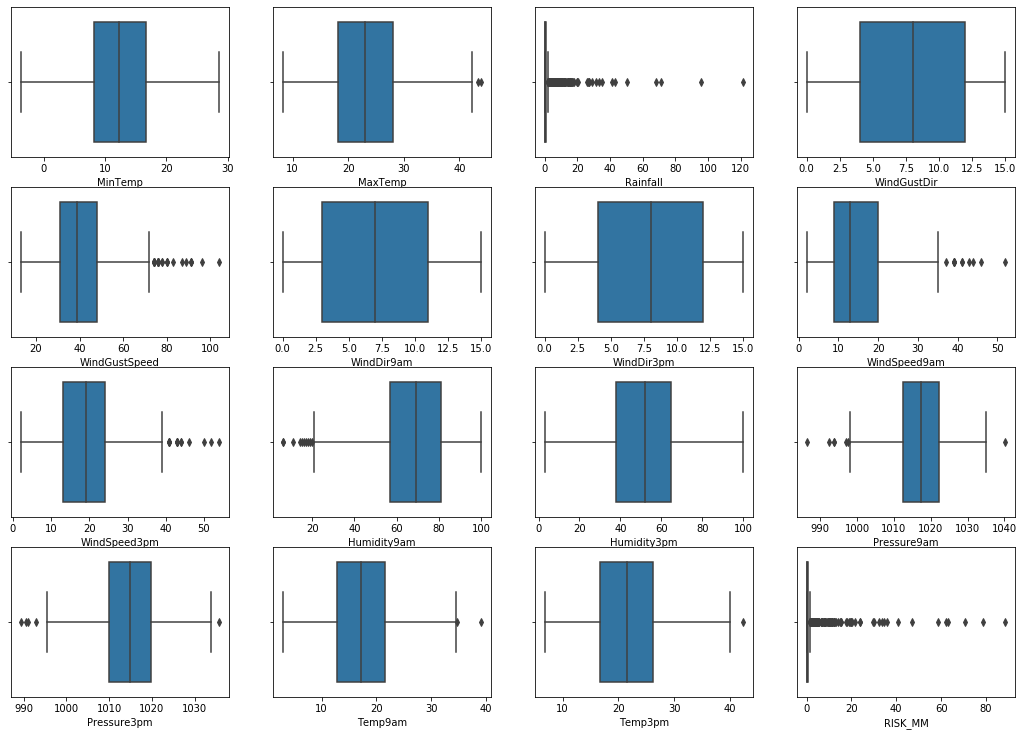

In [31]:
t=1
plt.figure(figsize = (18,16))
for i in dfc:
    plt.subplot(5,4,t)
    sns.boxplot(df[i])
    t+=1
    
plt.show()

In [32]:
for i in dfc:
    q1, q3 = np.quantile(df[i] , [0.25 ,0.75])
    IQR = q3 - q1
    ub = q3 + (1.5 * IQR)
    lb = q1 - (1.5 * IQR)
    df[i] = np.where(df[i] > ub, ub, df[i])
    df[i] = np.where(df[i] < lb, lb, df[i])

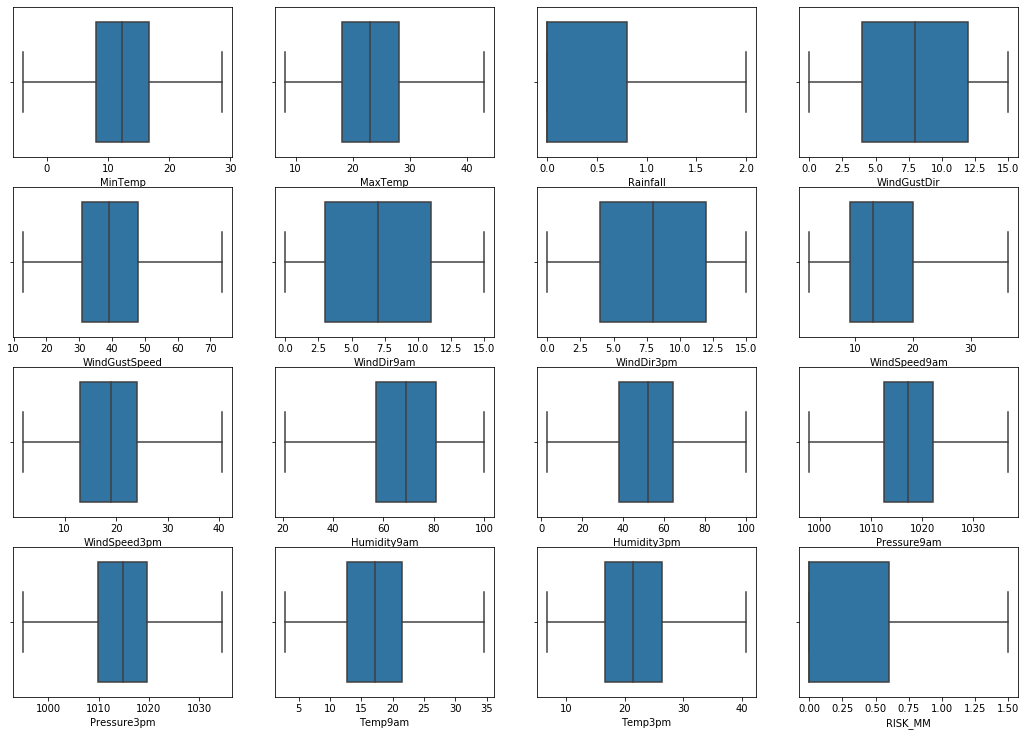

In [33]:
t=1
plt.figure(figsize = (18,16))
for i in dfc:
    plt.subplot(5,4,t)
    sns.boxplot(df[i])
    t+=1
    
plt.show()

### 4.	Summarize relationships among variables (10 marks)               
a.	Plot relevant categorical plots. Find out which are the variables most correlated or appear to be in causation with Target? Do you want to exclude some variables from the model based on this analysis? What other actions will you take?


b.	Plot all independent variables with the target & find out the relationship? Perform the Relevant Tests to find out if the Independent variables are associated with the Target Variable.

 Hint: based on your observations you may want to transform features or create additional features.


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 839 entries, 0 to 1039
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        839 non-null    float64
 1   MaxTemp        839 non-null    float64
 2   Rainfall       839 non-null    float64
 3   WindGustDir    839 non-null    float64
 4   WindGustSpeed  839 non-null    float64
 5   WindDir9am     839 non-null    float64
 6   WindDir3pm     839 non-null    float64
 7   WindSpeed9am   839 non-null    float64
 8   WindSpeed3pm   839 non-null    float64
 9   Humidity9am    839 non-null    float64
 10  Humidity3pm    839 non-null    float64
 11  Pressure9am    839 non-null    float64
 12  Pressure3pm    839 non-null    float64
 13  Temp9am        839 non-null    float64
 14  Temp3pm        839 non-null    float64
 15  RainToday      839 non-null    int64  
 16  RISK_MM        839 non-null    float64
 17  RainTomorrow   839 non-null    int64  
dtypes: float6

In [35]:
df.corr()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
MinTemp,1.000000,0.704978,0.079578,-0.135490,0.103714,-0.065189,-0.159109,0.114842,0.055996,-0.138483,0.075292,-0.388743,-0.404223,0.892916,0.670596,0.078654,0.059218,0.059133
MaxTemp,0.704978,1.000000,-0.261765,-0.197813,0.034939,-0.275239,-0.176909,-0.029384,-0.042749,-0.419919,-0.466465,-0.261941,-0.371343,0.870350,0.975757,-0.243299,-0.180333,-0.155245
Rainfall,0.079578,-0.261765,1.000000,0.146079,0.182056,0.151517,0.181282,0.124636,0.114800,0.423693,0.442958,-0.242825,-0.154040,-0.105733,-0.271829,0.968781,0.364869,0.307556
WindGustDir,-0.135490,-0.197813,0.146079,1.000000,0.199251,0.379965,0.611887,0.020634,0.124813,0.035422,-0.020459,-0.207883,-0.116329,-0.172929,-0.204144,0.127860,0.044322,0.022135
WindGustSpeed,0.103714,0.034939,0.182056,0.199251,1.000000,-0.043829,0.168220,0.566242,0.657535,-0.173595,-0.059167,-0.428219,-0.400248,0.062666,0.001022,0.177561,0.260012,0.227065
WindDir9am,-0.065189,-0.275239,0.151517,0.379965,-0.043829,1.000000,0.306848,-0.045213,0.033110,0.131333,0.191709,-0.030720,0.074105,-0.160814,-0.277198,0.144216,0.003219,-0.001646
WindDir3pm,-0.159109,-0.176909,0.181282,0.611887,0.168220,0.306848,1.000000,0.016096,0.111834,0.005913,-0.051135,-0.182012,-0.080216,-0.186090,-0.185474,0.171499,0.003536,-0.018021
WindSpeed9am,0.114842,-0.029384,0.124636,0.020634,0.566242,-0.045213,0.016096,1.000000,0.494480,-0.246766,-0.041748,-0.219712,-0.186185,0.057917,-0.046838,0.125632,0.110614,0.084501
WindSpeed3pm,0.055996,-0.042749,0.114800,0.124813,0.657535,0.033110,0.111834,0.494480,1.000000,-0.061402,0.064502,-0.285961,-0.265781,0.039371,-0.072474,0.117255,0.167664,0.148768
Humidity9am,-0.138483,-0.419919,0.423693,0.035422,-0.173595,0.131333,0.005913,-0.246766,-0.061402,1.000000,0.649093,0.043218,0.094021,-0.379539,-0.416918,0.400355,0.317401,0.275781


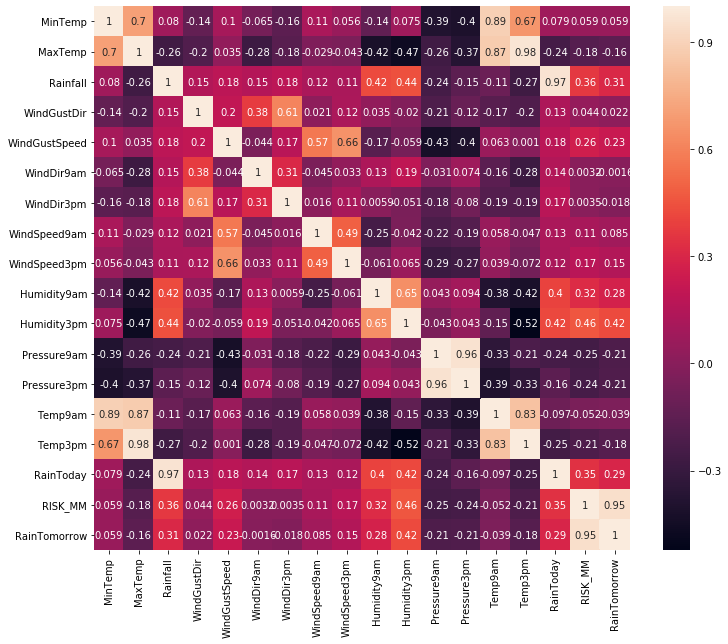

In [36]:
plt.figure(figsize = (12,10))
sns.heatmap(df.corr() , annot = True)

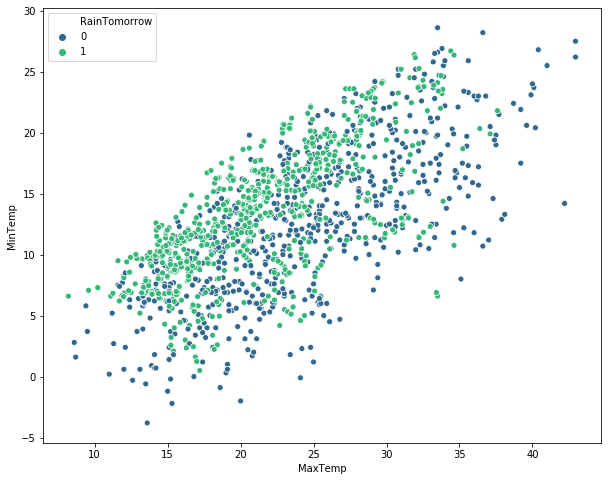

In [52]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = 'MaxTemp' , y ='MinTemp', hue = 'RainTomorrow', palette = 'viridis', data = df)

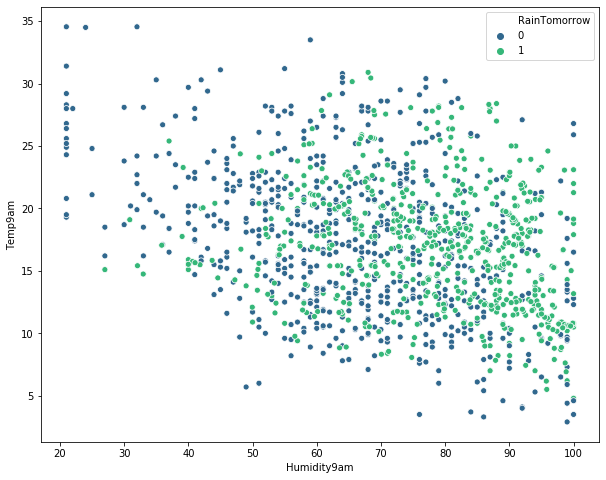

In [53]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = 'Humidity9am' , y ='Temp9am', hue = 'RainTomorrow', palette = 'viridis', data = df)

In [37]:
df.skew()

MinTemp          0.140608
MaxTemp          0.314417
Rainfall         1.150961
WindGustDir     -0.168192
WindGustSpeed    0.640678
WindDir9am       0.033665
WindDir3pm      -0.129502
WindSpeed9am     0.660597
WindSpeed3pm     0.382882
Humidity9am     -0.348339
Humidity3pm     -0.021196
Pressure9am     -0.162603
Pressure3pm     -0.112150
Temp9am          0.189458
Temp3pm          0.328583
RainToday        1.230203
RISK_MM          1.237527
RainTomorrow     1.473152
dtype: float64

In [38]:
df

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,16.000000,20.400000,2.000000,8.000000,63.000000,11.000000,12.000000,36.500000,20.000000,69.000000,92.000000,1018.500000,1017.600000,17.400000,15.600000,1,1.500000,1
1,18.500000,25.900000,2.000000,15.000000,39.000000,11.000000,15.000000,20.000000,22.000000,60.000000,36.000000,1004.600000,1003.600000,22.200000,25.100000,1,0.000000,0
3,25.500000,33.900000,0.200000,10.000000,41.000000,10.000000,9.000000,11.000000,19.000000,64.000000,59.000000,1009.800000,1007.400000,30.800000,31.500000,0,0.000000,0
5,10.500000,18.900000,2.000000,6.000000,37.000000,3.000000,13.000000,17.000000,13.000000,100.000000,66.000000,1009.500000,1007.200000,12.800000,17.600000,1,1.000000,0
6,7.100000,18.400000,0.000000,14.000000,73.500000,3.000000,7.000000,22.000000,24.000000,56.000000,52.000000,1008.900000,1001.700000,10.700000,17.800000,0,0.400000,0
7,9.300000,17.400000,0.600000,10.000000,44.000000,10.000000,9.000000,24.000000,15.000000,72.000000,50.000000,1017.200000,1017.200000,11.700000,16.300000,0,0.000000,0
8,24.200000,29.800000,2.000000,10.000000,41.000000,10.000000,9.000000,19.000000,28.000000,81.000000,73.000000,1010.300000,1008.400000,26.400000,28.400000,1,1.500000,1
10,14.600000,37.300000,0.000000,8.000000,28.000000,15.000000,7.000000,4.000000,11.000000,21.000000,6.000000,1017.300000,1011.900000,24.900000,36.400000,0,0.000000,0
11,8.000000,35.100000,0.000000,6.000000,46.000000,3.000000,7.000000,7.000000,26.000000,68.000000,16.000000,1017.300000,1013.600000,17.300000,33.600000,0,0.000000,0
12,6.600000,23.000000,0.000000,13.000000,26.000000,13.000000,13.000000,7.000000,13.000000,58.000000,25.000000,1014.500000,1011.200000,13.500000,22.300000,0,0.000000,0


### 5.	Split dataset into train and test (70:30) (5 marks)
a.	Are both train and test representative of the overall data? How would you ascertain this statistically?


In [39]:
X = df.drop(["RainTomorrow"], axis = 1)
y = df["RainTomorrow"]

In [40]:
X = sm.add_constant(X)

In [41]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X , y = smote.fit_resample(X,y)
df = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis = 1)

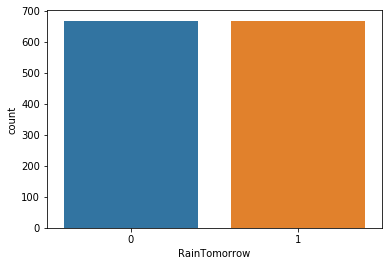

In [42]:
sns.countplot(df["RainTomorrow"])

In [59]:
X_train , X_test , y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 10)

In [60]:
def get_test_report(model , test_data):
    test_pred = model.predict(test_data)
    return(classification_report(y_test , test_pred))

In [47]:
def get_train_report(model , train_data):
    train_pred = model.predict(train_data)
    return(classification_report(y_train , train_pred))

In [67]:
def plot_confusion_matrix(model, test_data):
    y_pred = model.predict(test_data)
    cm = confusion_matrix(y_test , y_pred)
    conf_matrix = pd.DataFrame(data = cm, columns = ["Predicted : 0", "Predicted : 1"], index = ["Actual : 0", "Actual : 1"])
    sns.heatmap(conf_matrix, annot = True , fmt = "d" , cmap = ListedColormap(["lightskyblue"]), cbar = False,
               linewidths = 0.1 , annot_kws = {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()
    

In [74]:
def plot_roc(model , test_data):
    y_pred_prob = model.predict_proba(test_data)[:,1]
    fpr , tpr, thresholds = roc_curve(y_test , y_pred_prob)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0,1], [0,1], 'r--')
    plt.title("ROC Curve for Rain Prediction Classifier", fontsize = 15)
    plt.xlabel("False Positive Rate(1 - Specificity) ", fontsize = 15)
    plt.ylabel("True Positive Rate(Sensitivity) ", fontsize = 15)
    plt.text(x = 0.02, y = 0.9, s = ("AUC Score :", round(roc_auc_score(y_test, y_pred_prob),4)))
    plt.grid(True)

### 6.	Fit a base model and explain the reason of selecting that model. Please write your key observations (15 marks) 

a.	What is the overall Accuracy? Please comment on whether it is good or not. 

b.	What is Precision, Recall and F1 Score and what will be the optimization objective keeping in mind the problem statement.

c.	Which variables are significant?

d.	What is Cohen’s Kappa Value and what inference do you make from the model

e.	Which other key model output parameters do you want to look at? 


In [152]:
#Logistic Regression

Base_model = LogisticRegression()


In [154]:
Base_model.fit(X_train,y_train)

AttributeError: 'str' object has no attribute 'decode'

In [ ]:
plot_confusion_matrix(Base_model , test_data = X_test)

In [151]:
plot_roc(Base_model , test_data = X_test)

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
test_report = get_test_report(Base_model , test_data = X_test)
print(test_report)

In [ ]:
print('Classification Report for train set: \n' , get_train_report(Base_model , train_data = X_train))

In [ ]:
print('Classification Report for test set: \n' , get_train_report(Base_model , test_data = X_test))

In [54]:
#KNN

knnc = KNeighborsClassifier(n_neighbors = 3)
knn_model = knnc.fit(X_train, y_train)

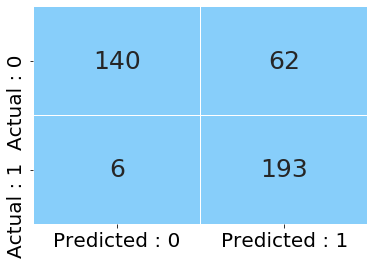

In [68]:
plot_confusion_matrix(knn_model , test_data = X_test)

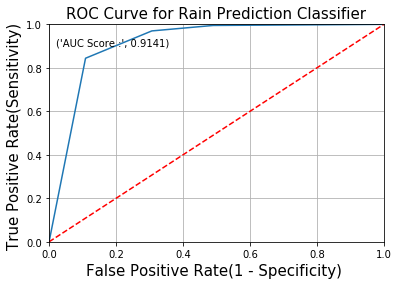

In [75]:
plot_roc(knn_model , test_data = X_test)

In [78]:
#KNN CLASSIFICATION USING GridSearchCV

tuned_parameters = {'n_neighbors':np.arange(1,25,2),
                   'metric':['hamming','euclidean','manhattan','Chebyshev']}
knnc = KNeighborsClassifier()
knn_grid = GridSearchCV(estimator= knnc ,
                       param_grid = tuned_parameters,
                       cv = 5,
                       scoring = 'accuracy')
knn_grid.fit(X_train , y_train)
print('Best parameters for KNN Classifier : ', knn_grid.best_params_ , '\n')

Best parameters for KNN Classifier :  {'metric': 'hamming', 'n_neighbors': 3} 



In [79]:
knnc = KNeighborsClassifier(n_neighbors= 1 , metric= 'manhattan')
knn_model_hp = knnc.fit(X_train , y_train)

In [86]:
train_report = get_train_report(knn_model , train_data = X_train)
print('Classification Report for train set: \n', train_report)

Classification Report for train set: 
               precision    recall  f1-score   support

           0       0.99      0.83      0.90       466
           1       0.85      0.99      0.92       469

    accuracy                           0.91       935
   macro avg       0.92      0.91      0.91       935
weighted avg       0.92      0.91      0.91       935



In [87]:
test_report = get_test_report(knn_model , test_data = X_test)
print('Classification Report for test set: \n', test_report)

Classification Report for test set: 
               precision    recall  f1-score   support

           0       0.96      0.69      0.80       202
           1       0.76      0.97      0.85       199

    accuracy                           0.83       401
   macro avg       0.86      0.83      0.83       401
weighted avg       0.86      0.83      0.83       401



In [89]:
#GaussianNB

gnb = GaussianNB()
gnb_model = gnb.fit(X_train , y_train)

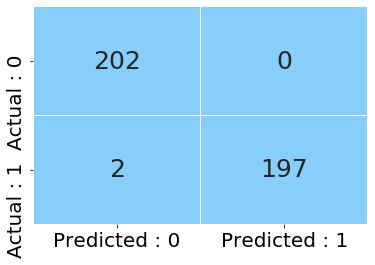

In [90]:
plot_confusion_matrix(gnb_model , test_data = X_test)

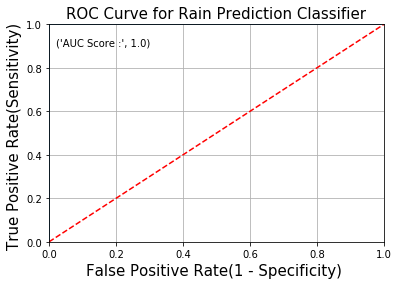

In [91]:
plot_roc(gnb_model , test_data = X_test)

In [92]:
train_report = get_train_report(gnb_model , train_data = X_train)
print('Classification Report for train set: \n', train_report)

Classification Report for train set: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       466
           1       1.00      1.00      1.00       469

    accuracy                           1.00       935
   macro avg       1.00      1.00      1.00       935
weighted avg       1.00      1.00      1.00       935



In [93]:
test_report = get_test_report(gnb_model , test_data = X_test)
print('Classification Report for test set: \n', test_report)

Classification Report for test set: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       202
           1       1.00      0.99      0.99       199

    accuracy                           1.00       401
   macro avg       1.00      0.99      1.00       401
weighted avg       1.00      1.00      1.00       401



In [96]:
#Decision tree Classification

dtc = DecisionTreeClassifier(criterion= 'entropy' , random_state= 10)
decision_tree = dtc.fit(X_train , y_train)

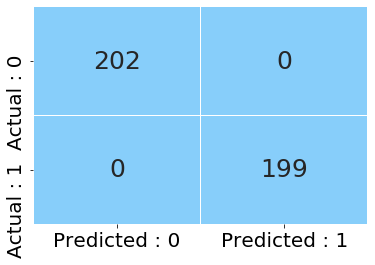

In [99]:
plot_confusion_matrix(decision_tree , test_data = X_test)

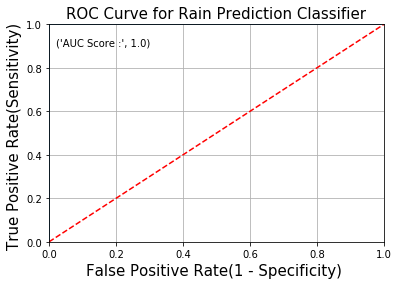

In [100]:
plot_roc(gnb_model , test_data = X_test)

In [97]:
train_report = get_train_report(decision_tree , train_data = X_train)
print('Classification Report for train set: \n', train_report)

Classification Report for train set: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       466
           1       1.00      1.00      1.00       469

    accuracy                           1.00       935
   macro avg       1.00      1.00      1.00       935
weighted avg       1.00      1.00      1.00       935



In [98]:
test_report = get_test_report(decision_tree , test_data = X_test)
print('Classification Report for test set: \n', test_report)

Classification Report for test set: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       202
           1       1.00      1.00      1.00       199

    accuracy                           1.00       401
   macro avg       1.00      1.00      1.00       401
weighted avg       1.00      1.00      1.00       401



From the above output we can see that the decsion tress is over-fitted.
To avoid the over-fitting ,  hyperparameter tuning is done with the decision tree model.


In [107]:
dt_model = DecisionTreeClassifier(criterion='gini',
                                 max_depth= 6, 
                                 min_samples_split= 5,
                                 random_state= 10)
decision_tree = dt_model.fit(X_train , y_train)
train_report = get_train_report(decision_tree , train_data = X_train)
print('Train Data:\n', train_report)
test_report = get_test_report(decision_tree , test_data = X_test)
print('Test Data:\n', test_report)

Train Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       466
           1       1.00      1.00      1.00       469

    accuracy                           1.00       935
   macro avg       1.00      1.00      1.00       935
weighted avg       1.00      1.00      1.00       935

Test Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       202
           1       1.00      1.00      1.00       199

    accuracy                           1.00       401
   macro avg       1.00      1.00      1.00       401
weighted avg       1.00      1.00      1.00       401



In [ ]:
# #Decision tree classification using GridSearchcv

# tuned_parameters = [{'criterion':['entropy','gini'],
#                      'max_depth': range(2,10),
#                      'max_features':['sqrt' , 'log2'],
#                      'min_samples_split': range(2,10),
#                      'min_samples_leaf': range(1,10),
#                      'max_leaf_nodes': range(1,10)}]
# dtc = DecisionTreeClassifier(random_state= 10)
# tree_grid = GridSearchCV(estimator= dtc,
#                         param_grid= tuned_parameters,
#                         cv = 5)
# tree_grid_model = tree_grid.fit(X_train , y_train)
# print("Best parameters for DecisionTree Classifier :",tree_grid_model.best_params_ , '\n')

In [109]:
#RandomForest Classification

rfc = RandomForestClassifier(n_estimators= 10, random_state= 10)
rf_model = rfc.fit(X_train , y_train)

In [110]:
train_report = get_train_report(rf_model , train_data = X_train)
print('Classification Report for train set: \n', train_report)

Classification Report for train set: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       466
           1       1.00      1.00      1.00       469

    accuracy                           1.00       935
   macro avg       1.00      1.00      1.00       935
weighted avg       1.00      1.00      1.00       935



In [111]:
test_report = get_test_report(rf_model , test_data = X_test)
print('Classification Report for test set: \n', test_report)

Classification Report for test set: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       202
           1       1.00      1.00      1.00       199

    accuracy                           1.00       401
   macro avg       1.00      1.00      1.00       401
weighted avg       1.00      1.00      1.00       401



### 7.	How do you improve overall efficiency of the model? Write clearly the changes that you will make before re-fitting the model. Fit the final model. (20 marks)
Please feel free to have any number of iterations to get to the final answer. Marks are awarded based on the quality of final model you are able to achieve. 


In [136]:
#Gradientboosting
gb_model = GradientBoostingClassifier(n_estimators= 150 , max_depth= 10, random_state=10)
gb_model.fit(X_train , y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=150, random_state=10)

In [137]:
train_report = get_train_report(gb_model , train_data = X_train)
print('Classification Report for train set: \n', train_report)

Classification Report for train set: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       466
           1       1.00      1.00      1.00       469

    accuracy                           1.00       935
   macro avg       1.00      1.00      1.00       935
weighted avg       1.00      1.00      1.00       935



In [138]:
test_report = get_test_report(gb_model , test_data = X_test)
print('Classification Report for test set: \n', test_report)

Classification Report for test set: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       202
           1       1.00      1.00      1.00       199

    accuracy                           1.00       401
   macro avg       1.00      1.00      1.00       401
weighted avg       1.00      1.00      1.00       401



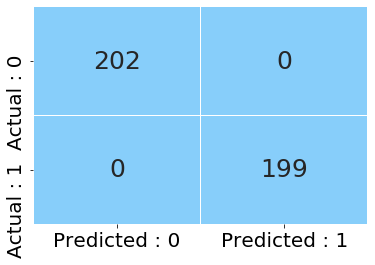

In [139]:
plot_confusion_matrix(gb_model , test_data = X_test)

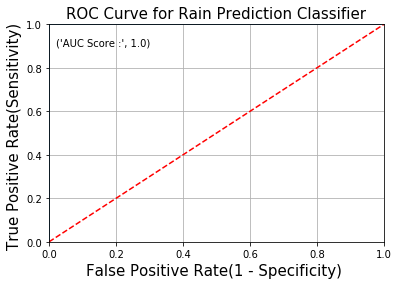

In [140]:
plot_roc(gb_model , test_data = X_test)

In [141]:
#AdaBoost classifier

ab_model = AdaBoostClassifier(n_estimators= 40 , random_state=10)
ab_model.fit(X_train , y_train)

AdaBoostClassifier(n_estimators=40, random_state=10)

In [142]:
train_report = get_train_report(ab_model , train_data = X_train)
print('Classification Report for train set: \n', train_report)

Classification Report for train set: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       466
           1       1.00      1.00      1.00       469

    accuracy                           1.00       935
   macro avg       1.00      1.00      1.00       935
weighted avg       1.00      1.00      1.00       935



In [143]:
test_report = get_test_report(ab_model , test_data = X_test)
print('Classification Report for test set: \n', test_report)

Classification Report for test set: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       202
           1       1.00      1.00      1.00       199

    accuracy                           1.00       401
   macro avg       1.00      1.00      1.00       401
weighted avg       1.00      1.00      1.00       401



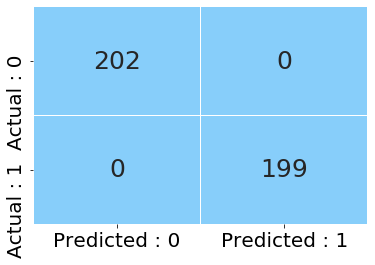

In [144]:
plot_confusion_matrix(ab_model , test_data = X_test)

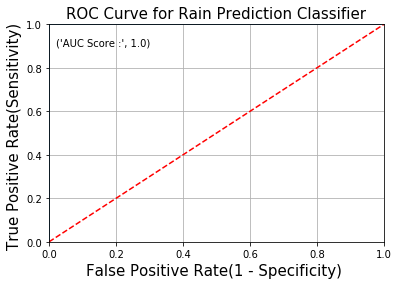

In [145]:
plot_roc(ab_model , test_data = X_test)

In [146]:
#XGB CLASSIFICATION

xgb_model = XGBClassifier(max_depth= 10 , gamma = 1)
xgb_model.fit(X_train , y_train)

XGBClassifier(gamma=1, max_depth=10)

In [147]:
train_report = get_train_report(xgb_model , train_data = X_train)
print('Classification Report for train set: \n', train_report)

Classification Report for train set: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       466
           1       1.00      1.00      1.00       469

    accuracy                           1.00       935
   macro avg       1.00      1.00      1.00       935
weighted avg       1.00      1.00      1.00       935



In [148]:
test_report = get_test_report(xgb_model , test_data = X_test)
print('Classification Report for test set: \n', test_report)

Classification Report for test set: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       202
           1       1.00      1.00      1.00       199

    accuracy                           1.00       401
   macro avg       1.00      1.00      1.00       401
weighted avg       1.00      1.00      1.00       401



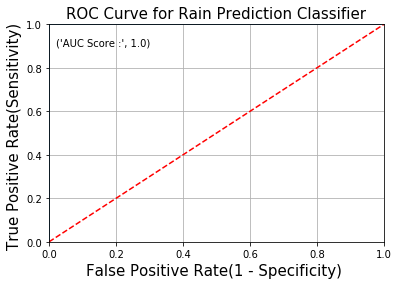

In [149]:
plot_roc(xgb_model , test_data = X_test)

In [150]:
#XGB classification using GridSearchCV

tune_parameters = {'learning rate':[0.1,0.2,0.3,0.4,0.5,0.6],
                  'max_depth': range(3,10),
                  'gamma':[0,1,2,3,4]}
xgb_model = XGBClassifier()
xgb_grid = GridSearchCV(estimator= xgb_model,param_grid= tune_parameters, cv = 3, scoring= 'roc_auc')
xgb_grid.fit(X_train , y_train)
print("Best paramters for XGBoost Classifier:" , xgb_grid.best_params_ , '\n')

Best paramters for XGBoost Classifier: {'gamma': 0, 'learning rate': 0.1, 'max_depth': 3} 



In [131]:
xgb_grid_model = XGBClassifier(learning_rate = xgb_grid.best_params_.get('learning rate'),
                         max_depth= xgb_grid.best_params_.get('max_depth'),
                         gamma = xgb_grid.best_params_.get('gamma'))
xgb_model = xgb_grid_model.fit(X_train , y_train)

In [132]:
train_report = get_train_report(xgb_model , train_data = X_train)
print('Classification Report for train set: \n', train_report)

Classification Report for train set: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       466
           1       1.00      1.00      1.00       469

    accuracy                           1.00       935
   macro avg       1.00      1.00      1.00       935
weighted avg       1.00      1.00      1.00       935



In [130]:
test_report = get_test_report(xgb_model , test_data = X_test)
print('Classification Report for test set: \n', test_report)

Classification Report for test set: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       202
           1       1.00      1.00      1.00       199

    accuracy                           1.00       401
   macro avg       1.00      1.00      1.00       401
weighted avg       1.00      1.00      1.00       401



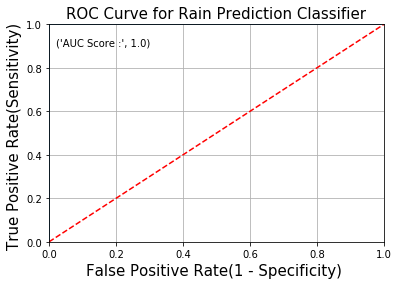

In [133]:
plot_roc(xgb_model , test_data = X_test)

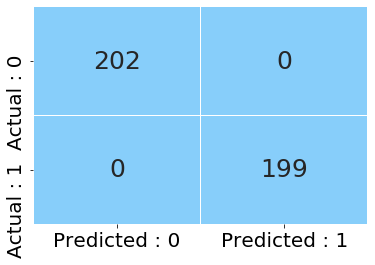

In [134]:
plot_confusion_matrix(decision_tree , test_data = X_test)

### 8.	Summarize as follows (10 marks) 

1.	Summarize the overall fit of the model and list down the measures to prove that it is a good model

2.	Write down a business interpretation/explanation of the model – which variables are affecting the target the most and explain the relationship. Feel free to use charts or graphs to explain.

3.	What changes from the base model had the most effect on model performance?

4.	What are the key risks to your results and interpretation?


In [ ]:
Almost every model has the accuracy sco